<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>  Modelo Logístico-Predicción de cáncer - TF2</center></span>

## <span style="color:blue">Autores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 


## <span style="color:blue">Estudiante</span>
Jonathan Rincón R, jorinconr@unal.edu.co

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Importa módulos](#Importa-módulos)
* [Funciones de activación](#Funciones-de-activación)
* [Regularizadores ](#Regularizadores)
* [El conjunto de datos cáncer de seno Wisconsin](#El-conjunto-de-datos-cáncer-de-seno-Wisconsin)
* [Lectura de datos](#Lectura-de-datos)
* [Preprocesamiento](#Preprocesamiento)
* [Crea el modelo Sequential modo 2](#Crea-el-modelo-Sequential-modo-2)
* [Compila](#Compila)
* [Entrenamiento](#Entrenamiento)
* [Predicciones](#Predicciones)
* [Matriz de confusión](#Matriz-de-confusión)
* [Evaluación del modelo](#Evaluación-del-modelo)


## <span style="color:blue">Introducción</span>

En esta lección construimos un modelo predictivo de regresión logística usando los datos de cáncer de la Universidad de Wisconsin.

Usaremos la funciones de activación *relu* y *sigmoid* y el regularizador *Dropout*. Adicionalmente introducimos el  modo 2 de escribir un modelo *Sequiential*.

Finalmente se construye una matriz de confusión para el problema.

## <span style="color:blue">Importa módulos</span>

In [ ]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
#
from tensorflow.keras.models import Sequential
#
from tensorflow.keras.layers import Dense, Dropout
#
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
#
print(tf.__version__)

## <span style="color:blue">Funciones de activación</span>

### Logística o sigmoide

Dada la salida del sumador digamos $y=\mathbf{w}'\mathbf{x} +b$, la función de activación *sigmoid* esta definida por

$$
\text{sigmoid}(y) = \frac{1}{1+\exp(-y)}
$$

Entonces, esta función de activación transforma cualquier número real a un número en el intervalo $(0,1)$, de tal manera que puede ser interpretado como una probabilidad. 

### Relu

Dada la salida del sumador digamos $y=\mathbf{w}'\mathbf{x} +b$, la función de activación *relu* esta definida por

$$
\text{relu}(y) = \begin{cases} &0, \text{ si } y\le 0,\\
 &y, \text{ en otro caso } \end{cases}
$$



## <span style="color:blue">Regularizadores </span>

### Dropout

Usaremos el regularizador Dropout. [Dropout paper](https://jmlr.org/papers/v15/srivastava14a.html). Este regularizador deja por fuera del entrenamiento en cada epoch un porcentaje de las neuronas de la capa, escogidas de forma aleatoria en cada epoch. Por ejemplo *Dropout(0.1)* deja el 10% de las neuronas por fuera del entrenamiento en cada epoch. En el artículo muestran que en muchos casos este regularizador funciona mejor que los clásicos L1 y L2.

## <span style="color:blue">El conjunto de datos cáncer de seno Wisconsin </span>

Puede descargar los datos en [kaggle- cancer de seno-Wisconsin](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)


### Meta-información sobre los datos


1. ID number
2. Diagnosis (M = maligno, B = benigno) 

Se calculan diez características de valor real para cada núcleo celular:

  - radius (media de las distancias desde el centro a los puntos del perímetro) 
  - texture (desviación estándar de los valores de la escala de grises) 
  - perimeter
  - area
  - smoothness (variación local en las longitudes de los radios)
  - compactness (perímetro ^ 2 / área - 1.0) 
  - concavity (severidad de las porciones cóncavas del contorno) 
  - concave points (número de porciones cóncavas del contorno) 
  - symetry 
  - fractal dimension ("aproximación de la línea de costa"
 
La media, el error estándar y el "peor" o el mayor (la media de los tres valores más grandes) de estas características se calcularon para cada imagen, lo que resultó en 30 características. Por ejemplo, el campo 3 es Radio medio, el campo 13 es Radio SE, el campo 23 es Peor radio.

Todos los valores de las características se recodifican con cuatro dígitos significativos.

datos faltantes: ninguno

Distribución de clases: 357 benignos, 212 malignos




## <span style="color:blue">Lectura de datos</span>

### Separa entrada (features) y salida 

In [ ]:
# Importing data
data = pd.read_csv('data.csv')
del data['Unnamed: 32']

## <span style="color:blue">Preprocesamiento</span>

In [6]:
x = data.iloc[:,2:].values # extrae como arreglos numpy
y = data.iloc[:,1].values

### Recodifica la variable objetivo

In [7]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

### Divide los datos. Entrenamiento y test

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)


In [9]:
x_test.shape

(57, 30)

### Normaliza los datos

In [10]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## <span style="color:blue">Crea el modelo Sequential modo 2</span>

In [11]:
classifier = Sequential()
## Adiciona capas una por una
classifier.add(Dense(units=16, activation='relu', input_shape=(30,)))
# Adding dropout to prevent overfitting (regularización)
classifier.add(Dropout(0.1)) # 10% out in each epoc
classifier.add(Dense(units=16, activation='relu'))
# Adding dropout to prevent overfitting (regularización)
classifier.add(Dropout(0.1))
classifier.add(Dense(units=1, activation='sigmoid'))


## <span style="color:blue">Compila</span>

In [4]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

NameError: name 'classifier' is not defined

In [2]:
classifier.summary()
plot_model(classifier, to_file='../Imagenes/cancer_seno.png', 
           show_shapes=True)

NameError: name 'classifier' is not defined

## <span style="color:blue">Entrenamiento</span>

In [15]:
history = classifier.fit(x_train, y_train, batch_size=32, epochs=150,validation_split = 0.2)

Epoch 1/150
13/13 [==============================] - 4s 125ms/step - loss: 0.9067 - accuracy: 0.3711 - val_loss: 0.7258 - val_accuracy: 0.5049
Epoch 2/150
13/13 [==============================] - 0s 25ms/step - loss: 0.7127 - accuracy: 0.5067 - val_loss: 0.5764 - val_accuracy: 0.7184
Epoch 3/150
13/13 [==============================] - 0s 23ms/step - loss: 0.5804 - accuracy: 0.7327 - val_loss: 0.4591 - val_accuracy: 0.8738
Epoch 4/150
13/13 [==============================] - 0s 30ms/step - loss: 0.4376 - accuracy: 0.8409 - val_loss: 0.3706 - val_accuracy: 0.9126
Epoch 5/150
13/13 [==============================] - 0s 32ms/step - loss: 0.3729 - accuracy: 0.8906 - val_loss: 0.3056 - val_accuracy: 0.9223
Epoch 6/150
13/13 [==============================] - 0s 30ms/step - loss: 0.3108 - accuracy: 0.9115 - val_loss: 0.2562 - val_accuracy: 0.9320
Epoch 7/150
13/13 [==============================] - 0s 28ms/step - loss: 0.2784 - accuracy: 0.9225 - val_loss: 0.2179 - val_accuracy: 0.9320
Epoch

## <span style="color:blue">Predicciones</span>

In [16]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
#y_pred = (y_pred > 0.5)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <=0.5] = 0

## <span style="color:blue">Matriz de confusión</span>

In [17]:
cm = confusion_matrix(y_test, y_pred)

In [18]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/y_test.shape[0])*100))

Our accuracy is 100.0%


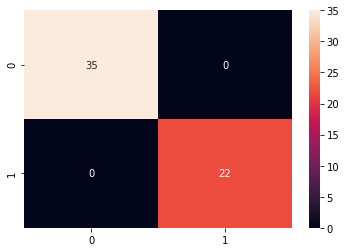

In [19]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

## <span style="color:blue">Evaluación del modelo</span> 

In [20]:

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

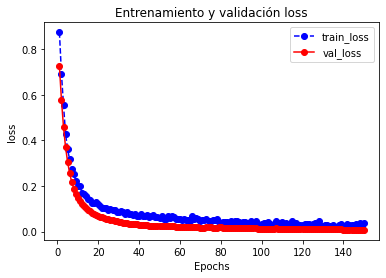

In [21]:
plot_metric(history, 'loss')

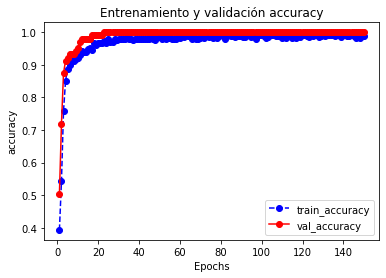

In [22]:
plot_metric(history, 'accuracy')

[Ir al inicio](#Contenido)